In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
# import plotly.graph_objects as go


# from sklearn.ensemble import IsolationForest

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
import seaborn as sns #visualisation


In [3]:
# import data set from the local driver


df1=pd.read_csv('drive/My Drive/Colab Notebooks/train1.csv', sep=';' )# , engine='python')
df2=pd.read_csv('drive/My Drive/Colab Notebooks/train2.csv', sep=';' )
df3=pd.read_csv('drive/My Drive/Colab Notebooks/test1.csv', sep=';' )
df4=pd.read_csv('drive/My Drive/Colab Notebooks/test2.csv', sep=';' )

frames = [df1,df2,df3,df4]
df_concat=pd.concat(frames)
print("The dataset has {} records".format(len(df_concat)))
df_concat.head(5)



The dataset has 995400 records


,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,attack_P1,attack_P2,attack_P3
0,2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,...,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0,0,0,0
1,2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,...,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0,0,0,0
2,2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,...,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0,0,0,0
3,2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,...,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0,0,0,0
4,2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,...,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0,0,0,0


In [4]:
#df_concat.shape

In [5]:
#df_concat.to_csv(r'/home/jovyan/HAI-HIL dataset.csv',index=False)

In [6]:
# drop the columns that are under attack in each stage.
df1=df_concat.drop(['attack_P1','attack_P2','attack_P3'],axis=1)#, inplace=True)

In [7]:
# make the Timestamp to datetime datatype
df1['time'] = pd.to_datetime(df1['time']) # conveting the date time stamp to the timestamp series
df1.head()
# # df1.shape

,time,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
0,2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,...,57.8704,0,395.0195,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0
1,2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,...,58.4853,0,398.3109,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0
2,2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,...,59.2629,0,397.8768,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0
3,2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,...,59.8235,0,398.6364,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0
4,2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,...,60.3118,0,401.2406,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0


In [8]:
df1.fillna(method = 'ffill', inplace = True)

In [9]:
# a Timestamp as index
df1= df1.set_index('time')
df1.head()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
time,,,,,,,,,,,,,,,,,,,,,
2019-09-11 20:00:00,0.0983,1.0702,399.2321,1110.3986,32.0,0.0,28.9981,35.7395,0.0,0.2838,...,57.8704,0,395.0195,-0.0004,330.6568,328.9388,50.9871,9973.0,27629.0,0
2019-09-11 20:00:01,0.0983,1.0699,399.2321,1110.3986,32.0,0.0,29.9914,35.7388,0.0,0.2838,...,58.4853,0,398.3109,-0.0012,330.2228,329.3728,50.9871,9973.0,27629.0,0
2019-09-11 20:00:02,0.0983,1.0703,399.2321,1110.3986,32.0,0.0,27.0122,35.7399,0.0,0.2914,...,59.2629,0,397.8768,0.0018,332.0493,329.7526,50.9871,9973.0,27629.0,0
2019-09-11 20:00:03,0.0983,1.0719,399.2321,1110.3986,32.0,0.0,32.9705,35.7452,0.0,0.2762,...,59.8235,0,398.6364,0.0033,331.5249,331.0547,50.9871,9973.0,27629.0,0
2019-09-11 20:00:04,0.0983,1.0710,399.2321,1110.3986,32.0,0.0,30.9843,35.7422,0.0,0.2838,...,60.3118,0,401.2406,0.0015,333.1706,331.1631,50.9871,9973.0,27629.0,0


##### Interpolation the data with each time stamp  

In [10]:
# resample the data with 5 second
df1=df1.resample('25s').mean()
df1.interpolate(method='polynomial',order=2)
df1.head()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack
time,,,,,,,,,,,,,,,,,,,,,
2019-09-11 20:00:00,0.0983,1.084068,399.2321,1110.3986,32.0,0.000304,31.222712,35.785844,0.0,0.283800,...,63.207104,0.0,405.742908,-0.000676,337.826244,334.469032,50.9871,9973.00,27628.92,0.0
2019-09-11 20:00:25,0.0983,1.108900,399.2321,1110.3986,32.0,0.001008,32.374740,35.868592,0.0,0.284108,...,67.910157,0.0,413.142015,0.000838,344.220204,342.332908,50.9871,9958.96,27628.92,0.0
2019-09-11 20:00:50,0.0983,1.111344,399.2321,1110.3986,32.0,0.000368,31.858320,35.876784,0.0,0.283800,...,68.557588,0.0,410.779804,0.000992,342.499268,342.921732,50.9871,9960.24,27629.00,0.0
2019-09-11 20:01:15,0.0983,1.084551,399.2321,1110.3986,32.0,0.000848,32.632954,35.789336,0.0,0.283800,...,65.198200,0.0,383.553244,0.000628,323.457756,332.242480,50.9871,9965.76,27629.00,0.0
2019-09-11 20:01:40,0.0983,1.005192,399.2321,1110.3986,32.0,0.000000,31.937760,35.522948,0.0,0.283800,...,17.453696,0.0,299.016936,-0.000176,294.989880,305.217004,50.9871,9972.96,27628.92,0.0


In [11]:
print(df1.shape)
# Count NaN values of whole DataFrame
nan_count = df1.isna().sum()#.sum()
print(nan_count )

(192024, 60)
P1_B2004      152208
P1_B2016      152208
P1_B3004      152208
P1_B3005      152208
P1_B4002      152208
P1_B4005      152208
P1_B400B      152208
P1_B4022      152208
P1_FCV01D     152208
P1_FCV01Z     152208
P1_FCV02D     152208
P1_FCV02Z     152208
P1_FCV03D     152208
P1_FCV03Z     152208
P1_FT01       152208
P1_FT01Z      152208
P1_FT02       152208
P1_FT02Z      152208
P1_FT03       152208
P1_FT03Z      152208
P1_LCV01D     152208
P1_LCV01Z     152208
P1_LIT01      152208
P1_PCV01D     152208
P1_PCV01Z     152208
P1_PCV02D     152208
P1_PCV02Z     152208
P1_PIT01      152208
P1_PIT02      152208
P1_TIT01      152208
P1_TIT02      152208
P2_24Vdc      152208
P2_Auto       152208
P2_Emgy       152208
P2_On         152208
P2_SD01       152208
P2_SIT01      152208
P2_TripEx     152208
P2_VT01e      152208
P2_VXT02      152208
P2_VXT03      152208
P2_VYT02      152208
P2_VYT03      152208
P3_LCP01D     152208
P3_LCV01D     152208
P3_LH         152208
P3_LL         152208


In [12]:
df1.fillna(method = 'ffill', inplace = True)

In [13]:
df1.shape

(192024, 60)

None


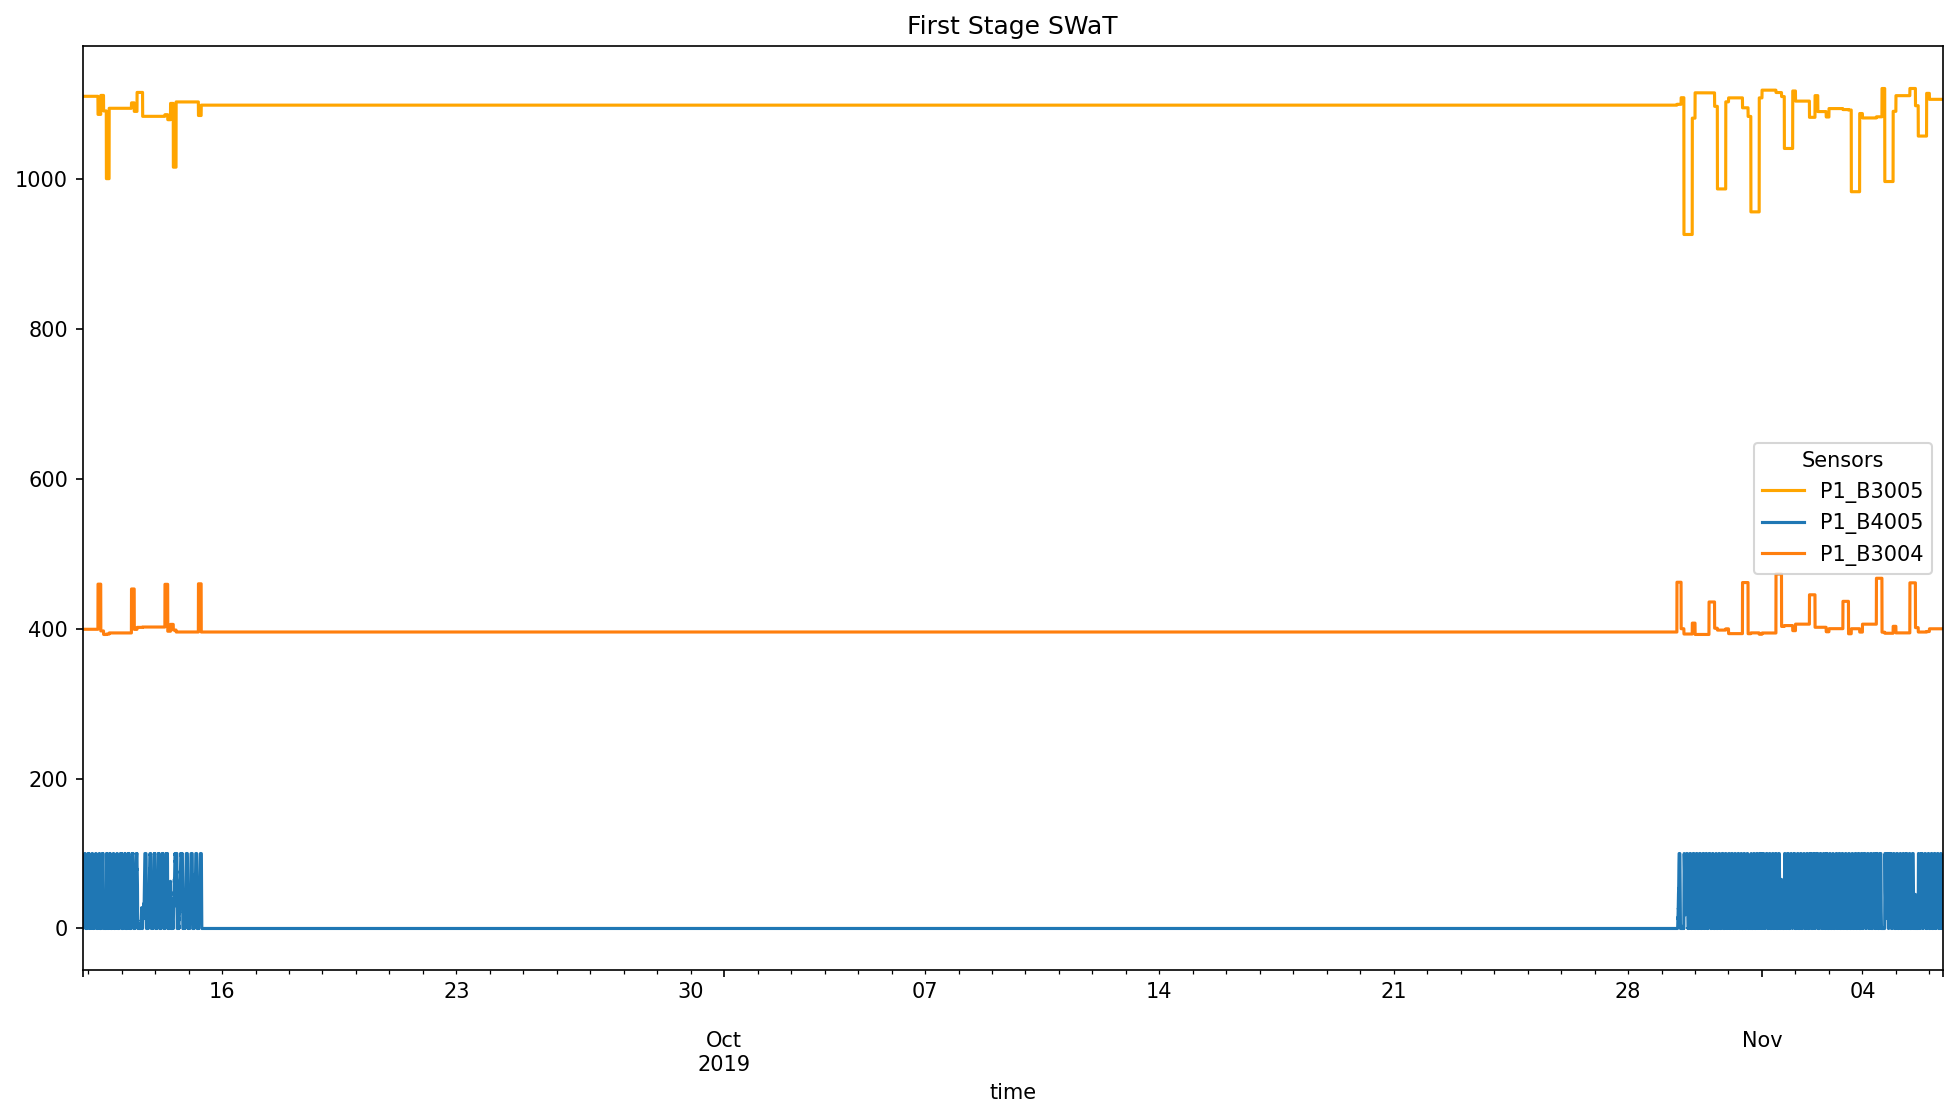

In [14]:
# Visualizing The first stage with respect to time series
def plot ():
    plt.figure(figsize=(16, 8), dpi=150)
    df1['P1_B3005'].plot(label='P1_B3005', color='orange')
    df1['P1_B4005'].plot(label='P1_B4005')
    df1['P1_B3004'].plot(label='P1_B3004')
    # adding title to the plot
    plt.title('First Stage SWaT')
    # adding Label to the x-axis
    plt.xlabel('time')
    # adding legend to the curve
    plt.legend(title='Sensors')

print (plot ())


#### Visualize the dataset
-  Plotting the number of normal and Attack transactions in the dataset.  

In [15]:
# make the class label into 2 since during sampling and interpolation it create the new class labels
df1.loc[df1['attack'] >= 0.1, 'lablel'] = 1
df1.loc[df1['attack'] ==0.0, 'lablel'] = 0

In [16]:
# fill the missing values with forward and backward of the cols

df1=df1.fillna(method="ffill")

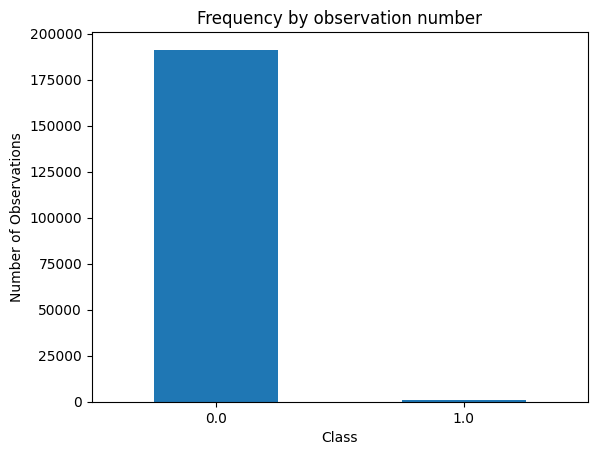

In [17]:
#Visualizing the imbalanced dataset
count_classes2 = pd.value_counts(df1['lablel'], sort = True)
count_classes2.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df1['lablel'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [18]:
df1.shape

(192024, 61)

In [19]:
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame with features and target variable
X = df1.drop('lablel', axis=1)
y = df1['lablel']

# Create SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df_resampled.head()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,attack,lablel
0,0.0983,1.084068,399.2321,1110.3986,32.0,0.000304,31.222712,35.785844,0.0,0.283800,...,0.0,405.742908,-0.000676,337.826244,334.469032,50.9871,9973.00,27628.92,0.0,0.0
1,0.0983,1.108900,399.2321,1110.3986,32.0,0.001008,32.374740,35.868592,0.0,0.284108,...,0.0,413.142015,0.000838,344.220204,342.332908,50.9871,9958.96,27628.92,0.0,0.0
2,0.0983,1.111344,399.2321,1110.3986,32.0,0.000368,31.858320,35.876784,0.0,0.283800,...,0.0,410.779804,0.000992,342.499268,342.921732,50.9871,9960.24,27629.00,0.0,0.0
3,0.0983,1.084551,399.2321,1110.3986,32.0,0.000848,32.632954,35.789336,0.0,0.283800,...,0.0,383.553244,0.000628,323.457756,332.242480,50.9871,9965.76,27629.00,0.0,0.0
4,0.0983,1.005192,399.2321,1110.3986,32.0,0.000000,31.937760,35.522948,0.0,0.283800,...,0.0,299.016936,-0.000176,294.989880,305.217004,50.9871,9972.96,27628.92,0.0,0.0


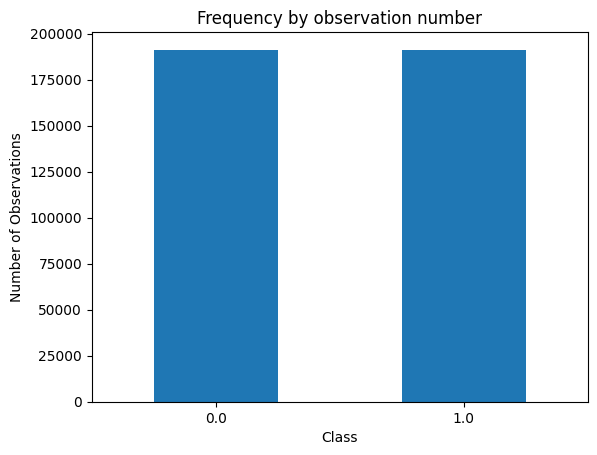

In [20]:
#Visualizing the balanced dataset
count_classes2 = pd.value_counts(df_resampled['lablel'], sort = True)
count_classes2.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df_resampled['lablel'].unique())))#, df1.A.unique()))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [21]:
df_resampled.isna().sum()

P1_B2004      0
P1_B2016      0
P1_B3004      0
P1_B3005      0
P1_B4002      0
             ..
P4_ST_PS      0
P4_ST_PT01    0
P4_ST_TT01    0
attack        0
lablel        0
Length: 61, dtype: int64

In [22]:
#Count 1 unique values in each columns
df2=df_resampled.nunique().reset_index()
df2.columns = ['feature','number Of unique']
df2[df2['number Of unique']==1]

,feature,number Of unique
32,P2_Auto,1
33,P2_Emgy,1
34,P2_On,1
37,P2_TripEx,1
45,P3_LH,1
46,P3_LL,1
51,P4_HT_PS,1


In [23]:
# drop the  cols
#df1= df1.drop('P2_Auto','P2_Emgy','P2_On','P2_TripEx','P3_LH','P3_LL','P4_HT_PS', axis=0)

# drop two columns name is 'C' and 'D'
df1=df_resampled.drop(['P2_Auto','P2_Emgy','P2_On','P2_TripEx','P3_LH','P3_LL','P4_HT_PS','attack'], axis=1)

In [24]:
import seaborn as sns


#get correlations of each features in dataset
c = df1.corr()
top_corr_features = c.index
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [25]:

c=c.lablel.sort_values(ascending=False).head(42).keys().drop('lablel') # corelation
print(c)

Index(['P1_B2004', 'P1_B2016', 'P1_PCV01D', 'P1_PCV01Z', 'P4_ST_LD',
       'P4_ST_PO', 'P4_LD', 'P1_B3004', 'P4_HT_LD', 'P3_LCV01D', 'P4_HT_PO',
       'P1_PIT01', 'P4_ST_PT01', 'P1_FT01', 'P1_FT01Z', 'P1_FT02Z', 'P1_B400B',
       'P4_ST_FD', 'P1_B4005', 'P4_HT_FD', 'P1_FCV01D', 'P1_FCV01Z', 'P1_FT02',
       'P1_PIT02', 'P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02Z', 'P1_LIT01',
       'P1_PCV02D', 'P1_LCV01D', 'P1_LCV01Z', 'P1_B3005', 'P1_FT03',
       'P1_FT03Z', 'P4_ST_PS', 'P1_B4022', 'P1_FCV02D', 'P1_FCV02Z',
       'P3_LCP01D', 'P1_B4002', 'P2_SIT01'],
      dtype='object')


In [26]:
# Select Multiple Columns
df2 = df1.loc[:,['P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02D', 'P1_FT01', 'P1_PCV01D',
       'P1_PCV01Z', 'P1_PCV02Z', 'P1_B2016', 'P1_B2004', 'P1_FT01Z',
       'P4_ST_LD', 'P4_ST_PO', 'P4_LD', 'P3_LCV01D', 'P1_PIT01', 'P4_ST_PT01',
       'P4_HT_PO', 'P4_HT_LD', 'P1_B400B', 'P1_FT02Z', 'P1_B4005', 'P1_FT02',
       'P4_ST_FD', 'P1_PIT02', 'P1_FCV01D', 'P1_FCV01Z', 'P1_B3004',
       'P4_HT_FD', 'P1_LIT01', 'P1_B3005', 'P4_ST_PS', 'P1_FT03', 'P1_FT03Z',
       'P1_FCV02Z', 'P1_FCV02D', 'P1_LCV01Z', 'P2_VYT02', 'P1_LCV01D',
       'P3_LCP01D', 'P2_VXT02', 'P2_VXT03','lablel']]

In [27]:
df2.shape

(382520, 42)

In [28]:
#To see how the data is spread betwen Attack and Normal
#print(df1.groupby('Normal/Attack')['Normal/Attack'].count())
print(df2.groupby('lablel')['lablel'].count())

lablel
0.0    191260
1.0    191260
Name: lablel, dtype: int64


In [29]:
#df2.info()

#### Normalize using min Max scaler  

In [30]:
con_feats = ['P1_FCV03D', 'P1_FCV03Z', 'P1_PCV02D', 'P1_FT01', 'P1_PCV01D',
       'P1_PCV01Z', 'P1_PCV02Z', 'P1_B2016', 'P1_B2004', 'P1_FT01Z',
       'P4_ST_LD', 'P4_ST_PO', 'P4_LD', 'P3_LCV01D', 'P1_PIT01', 'P4_ST_PT01',
       'P4_HT_PO', 'P4_HT_LD', 'P1_B400B', 'P1_FT02Z', 'P1_B4005', 'P1_FT02',
       'P4_ST_FD', 'P1_PIT02', 'P1_FCV01D', 'P1_FCV01Z', 'P1_B3004',
       'P4_HT_FD', 'P1_LIT01', 'P1_B3005', 'P4_ST_PS', 'P1_FT03', 'P1_FT03Z',
       'P1_FCV02Z', 'P1_FCV02D', 'P1_LCV01Z', 'P2_VYT02', 'P1_LCV01D',
       'P3_LCP01D', 'P2_VXT02', 'P2_VXT03']
scaler = MinMaxScaler()
df2[con_feats] = scaler.fit_transform(df2[con_feats])
df2.head()

,P1_FCV03D,P1_FCV03Z,P1_PCV02D,P1_FT01,P1_PCV01D,P1_PCV01Z,P1_PCV02Z,P1_B2016,P1_B2004,P1_FT01Z,...,P1_FT03Z,P1_FCV02Z,P1_FCV02D,P1_LCV01Z,P2_VYT02,P1_LCV01D,P3_LCP01D,P2_VXT02,P2_VXT03,lablel
0,0.537452,0.536127,0.0,0.179562,0.352529,0.356166,0.028442,0.508792,0.950413,0.379942,...,0.834902,0.988553,1.0,0.194140,0.607479,0.204757,0.027433,0.772417,0.702950,0.0
1,0.539011,0.534058,0.0,0.191394,0.358677,0.356166,0.028420,0.521711,0.950413,0.403556,...,0.833721,0.988435,1.0,0.202888,0.615501,0.209761,0.007839,0.737551,0.695111,0.0
2,0.538543,0.534578,0.0,0.189743,0.367812,0.362322,0.028398,0.522983,0.950413,0.404704,...,0.834487,0.988426,1.0,0.205048,0.590151,0.209210,0.002202,0.767790,0.701232,0.0
3,0.536154,0.534010,0.0,0.190685,0.373353,0.367866,0.028398,0.509044,0.950413,0.404619,...,0.836254,0.988534,1.0,0.202386,0.612150,0.203415,0.009008,0.732456,0.683357,0.0
4,0.534021,0.534012,0.0,0.186099,0.364499,0.367655,0.028398,0.467756,0.950413,0.394743,...,0.835924,0.988565,1.0,0.196592,0.601465,0.198149,0.296701,0.779389,0.691009,0.0


In [31]:
# Taking a random sample of 20% of the data
df2 = df2.sample(frac=0.1, random_state=42)
df2.shape

(38252, 42)

#### Hyperparameter Tuning

In [32]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

# Load and preprocess your data
#data = pd.read_csv('your_data.csv')
X = df2.drop('lablel', axis=1)
y = df2['lablel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the function to create the autoencoder model
def create_autoencoder(optimizer='adam', loss='mean_squared_error', activation='relu', hidden_units=16):
    model = Sequential()
    model.add(Dense(units=hidden_units, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(units=X_train.shape[1], activation=activation))
    model.compile(optimizer=optimizer, loss=loss)
    return model

# Create the KerasRegressor wrapper
autoencoder = KerasRegressor(build_fn=create_autoencoder, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'loss': ['mean_squared_error', 'mean_absolute_error'],
    'activation': ['relu', 'sigmoid'],
    #'hidden_layers': [1,2,3,4,5,6],
    'hidden_units': [4,8, 16, 32,64,128,256],
    'epochs': [10,15,20,30],
    'batch_size': [10,32, 64],

}

# Perform random search
random_search = RandomizedSearchCV(estimator=autoencoder, param_distributions=param_grid, cv=3, n_iter=10)
random_search.fit(X_train, X_train)


# Get the best model and its hyperparameters
best_autoencoder = random_search.best_estimator_
best_parameters = random_search.best_params_

# Evaluate the best model on the test data
reconstruction_error = best_autoencoder.score(X_test, X_test)

print("Best Parameters:", best_parameters)
print("Reconstruction Error:", reconstruction_error)



<ipython-input-32-4afa5d4befe2>:26: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  autoencoder = KerasRegressor(build_fn=create_autoencoder, verbose=0)


Best Parameters: {'optimizer': 'adam', 'loss': 'mean_absolute_error', 'hidden_units': 256, 'epochs': 15, 'batch_size': 10, 'activation': 'sigmoid'}
Reconstruction Error: -0.008410747162997723


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV

# Load and preprocess your data
#data = pd.read_csv('your_data.csv')
X = df2.drop('lablel', axis=1)
y = df2['lablel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the function to create the autoencoder model
def create_autoencoder(hidden_layers=1, hidden_units=16):
    model = Sequential()
    model.add(Dense(units=hidden_units, activation='relu', input_shape=(X_train.shape[1],)))

    for _ in range(hidden_layers):
        model.add(Dense(units=hidden_units, activation='relu'))

    model.add(Dense(units=X_train.shape[1], activation='sigmoid'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the KerasRegressor wrapper
autoencoder = KerasRegressor(build_fn=create_autoencoder, verbose=0)

# Define the hyperparameters to tune
param_grid = {
    'hidden_layers': [1, 2, 3],  # Possible number of hidden layers
    'hidden_units': [8, 16, 32, 64],  # Possible number of units in each layer
    'epochs': [10, 20],
    'batch_size': [32, 64]
}

# Perform grid search cross-validation
grid = RandomizedSearchCV(estimator=autoencoder, param_distributions=param_grid, cv=5)
grid_result = grid.fit(X_train, X_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Evaluate the model on the testing set
best_model = grid_result.best_estimator_.model
mse = best_model.evaluate(X_test, X_test)
print("Mean Squared Error on Testing Set:", mse)


<ipython-input-40-3ff771e8b878>:30: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  autoencoder = KerasRegressor(build_fn=create_autoencoder, verbose=0)


Best: -0.000356 using {'hidden_units': 64, 'hidden_layers': 3, 'epochs': 20, 'batch_size': 64}
240/240 [==============================] - 0s 1ms/step - loss: 2.7923e-04
Mean Squared Error on Testing Set: 0.0002792307932395488
